Sample mean of Z (with 1000000 samples): 36.352146
Sample variance of Z (with 1000000 samples): 282753442.4818957


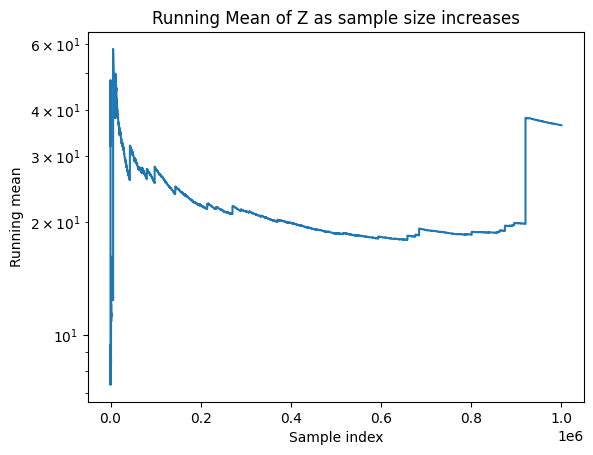

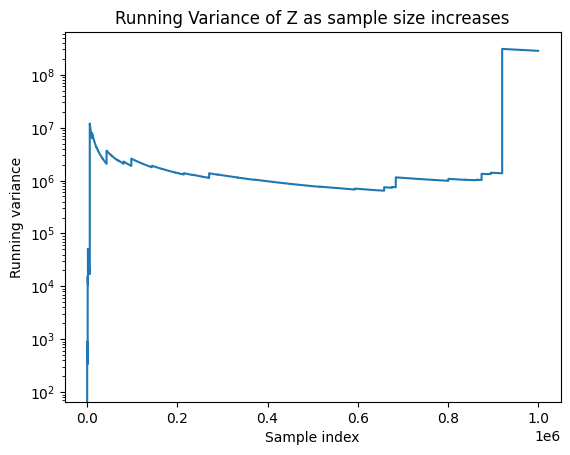

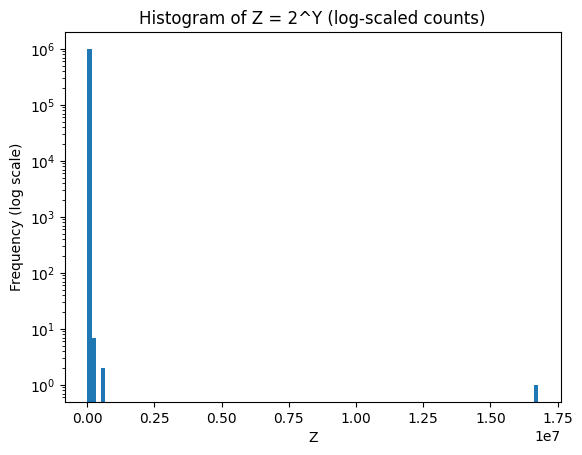

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Generate samples of Y
#    Y is the trial count up to and including the first tail (p=0.5).
#    We'll do this in a vectorized way:
#      - For each sample, count how many Heads (0) appear before the first Tail (1).
#      - Alternatively, you can keep flipping in a loop, but that's slower.
#
#    An efficient approach: The probability that Y=k is (0.5)^k.
#    We can invert a uniform random variable to generate Y.

def sample_Y_geom(p=0.5, size=10_000_00):
    # Y takes values 1, 2, 3, ... with P(Y=k) = (1-p)^(k-1) * p
    # If p=0.5, P(Y=k) = (0.5)^k
    # We'll use the inverse transform method:
    #   U ~ Uniform(0,1). Then Y = smallest k s.t. sum_{j=1..k} (0.5^j) >= U, etc.
    #
    # A simpler approach: number of Bernoulli(0.5) trials until first success
    # can be done with a geometric distribution generator in NumPy
    #  (but note that different libraries define "Geom(p)" differently)
    #
    # For np.random.geometric, p is the success probability.
    # So we can do:
    return np.random.geometric(p, size=size)

n_samples = 1_000_000
Y_samples = sample_Y_geom(p=0.5, size=n_samples)

# 2) Compute Z = 2^Y
Z_samples = 2**Y_samples

# 3) Compute sample mean and sample variance
#    (They should be very large, and as n grows, the mean/variance won't converge)
sample_mean = np.mean(Z_samples)
sample_var  = np.var(Z_samples, ddof=1)  # sample variance with Bessel's correction

print(f"Sample mean of Z (with {n_samples} samples): {sample_mean}")
print(f"Sample variance of Z (with {n_samples} samples): {sample_var}")

# 4) Show how these estimates evolve as we take more samples
running_means = []
running_vars = []
running_sum = 0.0
running_sum_sq = 0.0

for i in range(1, n_samples+1):
    z_i = Z_samples[i-1]
    running_sum += z_i
    running_sum_sq += z_i**2
    # Mean up to i
    mean_i = running_sum / i
    # Var up to i
    if i > 1:
        var_i = (running_sum_sq - i*mean_i**2) / (i-1)
    else:
        var_i = 0
    running_means.append(mean_i)
    running_vars.append(var_i)

# Plot the running mean
plt.figure()
plt.plot(running_means)
plt.title("Running Mean of Z as sample size increases")
plt.xlabel("Sample index")
plt.ylabel("Running mean")
plt.yscale("log")  # log-scale to see the growth more clearly
plt.show()

# Plot the running variance
plt.figure()
plt.plot(running_vars)
plt.title("Running Variance of Z as sample size increases")
plt.xlabel("Sample index")
plt.ylabel("Running variance")
plt.yscale("log")  # also log-scale
plt.show()

# 5) Plot a histogram of Z. Because of extremely large outliers,
#    it's often best to use a log scale on the x-axis or y-axis.
plt.figure()
plt.hist(Z_samples, bins=100, log=True)
plt.title("Histogram of Z = 2^Y (log-scaled counts)")
plt.xlabel("Z")
plt.ylabel("Frequency (log scale)")
plt.show()


Theoretical E[Z]      = 0.225400
Simulated  E[Z]      = 21.763214
Theoretical Var(Z)   = 0.021774
Simulated  Var(Z)    = 6474545.373930


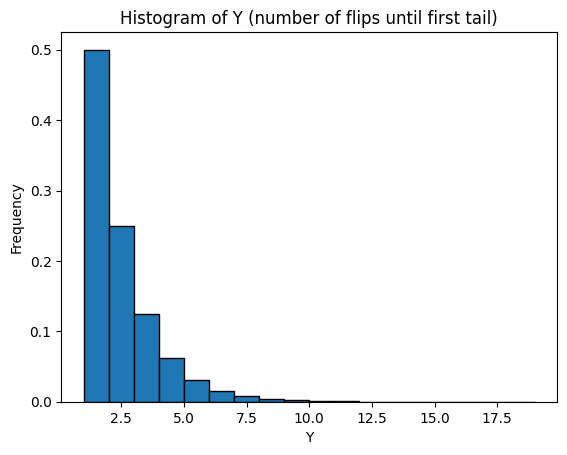

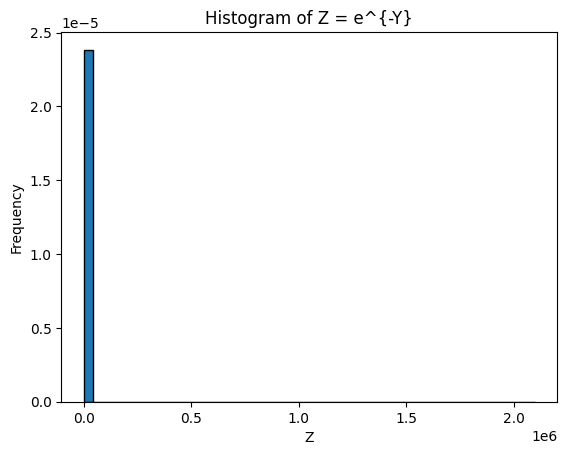

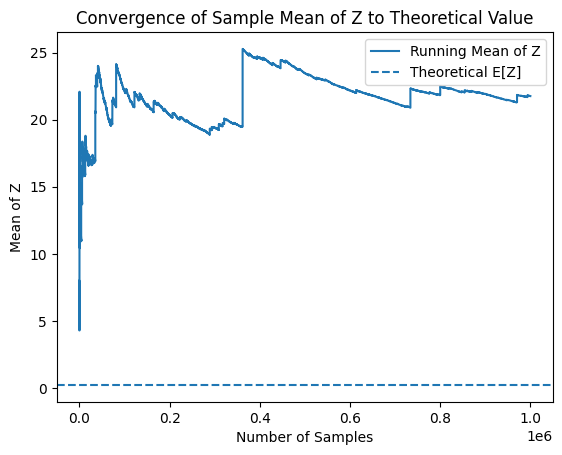

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Suppose we already have Y, Z from the code above
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
n_samples = 10_000_00  # number of samples to draw

# 1) Generate Y using a simple geometric approach
#    "Number of trials until first tail" for a fair coin.
Y = []
for _ in range(n_samples):
    count = 0
    while True:
        count += 1
        flip = np.random.choice([0,1])  # 0=head, 1=tail
        if flip == 1:  # got a tail
            Y.append(count)
            break

Y = np.array(Y)

# 2) Compute Z = e^{-Y}
Z = np.exp ** -Y

# 3) Sample mean and variance
sample_mean = np.mean(Z)
sample_var  = np.var(Z, ddof=1)  # unbiased estimator

# 4) Theoretical values (we derived above)
#    For p=1/2:
E_Z_theory = np.exp(-1) / (2 - np.exp(-1))
E_Z2_theory = (0.5 * np.exp(-2)) / (1 - 0.5 * np.exp(-2))
Var_Z_theory = E_Z2_theory - E_Z_theory**2

print(f"Theoretical E[Z]      = {E_Z_theory:.6f}")
print(f"Simulated  E[Z]      = {sample_mean:.6f}")
print(f"Theoretical Var(Z)   = {Var_Z_theory:.6f}")
print(f"Simulated  Var(Z)    = {sample_var:.6f}")


# 1) Histogram of Y
plt.figure()
plt.hist(Y, bins=range(1, 20), edgecolor='black', density=True)
plt.title("Histogram of Y (number of flips until first tail)")
plt.xlabel("Y")
plt.ylabel("Frequency")
plt.show()

# 2) Histogram of Z = e^{-Y}
plt.figure()
plt.hist(Z, bins=50, edgecolor='black', density=True)
plt.title("Histogram of Z = e^{-Y}")
plt.xlabel("Z")
plt.ylabel("Frequency")
plt.show()

# 3) Running estimate of E[Z]
running_means = np.cumsum(Z) / (np.arange(len(Z)) + 1)
plt.figure()
plt.plot(running_means, label="Running Mean of Z")
plt.axhline(E_Z_theory, linestyle="--", label="Theoretical E[Z]")
plt.title("Convergence of Sample Mean of Z to Theoretical Value")
plt.xlabel("Number of Samples")
plt.ylabel("Mean of Z")
plt.legend()
plt.show()
